# Imports

In [1]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

# Functions

In [2]:
def plot_correlation_heatmap(dataframe: pd.DataFrame, title: str):
    """
    Plot a triangle correlation heatmap with a color gradient from blue to red, using the data from the provided
    dataframe. The user should precise the plot title.
    Args:
        dataframe: a pandas dataframe containing values we want to correlate and represent their correlation
        title: string, the plot title
    """
    plt.figure(figsize=(12, 6))

    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(dataframe.corr(numeric_only=True), dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    heatmap = sns.heatmap(
        dataframe.corr(numeric_only=True),
        mask=mask,
        cmap=cmap,
        vmin=-1,
        vmax=1,
        annot=True,
        linewidths=0.5,
    )
    heatmap.set_title(title, fontdict={"fontsize": 18}, pad=16)
    plt.show()

In [3]:
def separate_target_from_features(
    train_df: pd.DataFrame,
    val_df: pd.DataFrame,
    test_df: pd.DataFrame,
    target_name: str,
    log_transformation: bool = False,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, np.array, np.array, np.array]:
    """
    From the three datasets (pandas dataframes, train, validation and test) containing all features and the
    target column, separate features and target to return three pandas dataframes containing only features and
    three numpy arrays containing target values. The target is selected according to the provided target_name.

    Args:
        train_df: pandas dataframe containing all training features and target values
        val_df: pandas dataframe containing all validation features and target values
        test_df: pandas dataframe containing all test features and target values

    Returns:
        train: pandas dataframe containing only features values for training dataset
        val: pandas dataframe containing only features values for validation dataset
        test: pandas dataframe containing only features values for test dataset
        y_train: numpy array containing train target values
        y_val: numpy array containing validation target values
        y_test: numpy array containing test target values
    """

    # Select the target values from original datasets
    y_train = train_df[target_name]
    y_val = val_df[target_name]
    y_test = test_df[target_name]

    # If the target value should be log transformed:
    if log_transformation:
        y_train = np.log1p(y_train)
        y_val = np.log1p(y_val)
        y_test = np.log1p(y_test)

    # Remove the target column from features dataset
    del train[target_name]
    del val[target_name]
    del test[target_name]

    return train, val, test, y_train, y_val, y_test

In [4]:
def prepare_feature_matrix_onehot(feature_df: pd.DataFrame) -> np.array:
    """
    From a pandas dataframe containing feature data (one feature per column), compute the feature matrix with one-hot encoding
    of the categorical columns.
    Categorical columns are one hot encoded using the DictVectorizer from sklearn.

    Args:
        feature_df: pandas dataframe containing feature data (one individual per row and one feature per column)

    Returns:
        feature_matrix: a numpy 2D array corresponding to the obtained feature matrix
    """

    feature_dicts = feature_df.to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    feature_matrix = dv.fit_transform(feature_dicts)

    return feature_matrix

In [5]:
def logistic_regression_accuracy(
    train: np.array,
    val: np.array,
    test: np.array,
    y_train: np.array,
    y_val: np.array,
    y_test: np.array,
) -> Tuple[float, float, float]:
    """
    Computes the accuracy of a logistic regression model trained on the provided training data, for training, validation
    and test data. The provided matrices should already be encoded for categorical variables.
    The logistic regression model has these parameters (fixed for this exercise): solver="liblinear", C=1.0, max_iter=1000, random_state=42.

    Args:
        feature_list: list of strings containing the features we want to keep in our feature matrices.
        train: numpy array containing the training dataset values (features only)
        val: numpy array containing the validation dataset values (features only)
        test: numpy array containing the test dataset values (features only)
        y_train: numpy array containing the target values for the training dataset
        y_val: numpy array containing the target values for the validation dataset
        y_test: numpy array containing the target values for the test dataset

    Returns:
        score_train: float, the accuracy score obtained on the training dataset
        score_val: float, the accuracy score obtained on the validation dataset
        score_test: float, the accuracy score obtained on the test dataset
    """

    # Train the model with these features:
    model = LogisticRegression(
        solver="liblinear", C=10, max_iter=1000, random_state=42
    )
    model.fit(X_train_features, y_train)

    # Accuracy on the train dataset
    score_train = model.score(X_train_features, y_train)
    print("Training Accuracy Score", round(score_train, 3))
    # Accuracy on the validation set
    score_val = model.score(X_val_features, y_val)
    print("Validation Accuracy Score", round(score_val, 3))
    # Accuracy on the test set
    score_test = model.score(X_test_features, y_test)
    print("Test Accuracy Score", round(score_test, 3))

    return score_train, score_val, score_test

# Load dataset

In [6]:
car_price = pd.read_csv('car_price.csv')

In [7]:
car_price.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Features

For the rest of the homework, you'll need to use only these columns:
- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg

In [8]:
# Setup the list of features to keep. We should also keep the MSRP column (our target value)
features_to_keep = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP",
]

# Data preparation

Select only the features from above and transform their names using next line:
```python
data.columns = data.columns.str.replace(' ', '_').str.lower()
```

In [9]:
# Select the subset of features
car_price = car_price[features_to_keep]

In [10]:
# Transform their names
car_price.columns = car_price.columns.str.replace(' ', '_').str.lower()

Fill in the missing values of the selected features with 0.

In [11]:
# First check where are the missing values
car_price.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

Two features have missing values: engine_hp and engine_cylinders. Since they correspond to horse power and the number of cylinders, this does make a good sense to replace these values by 0. However, without any information, we cannot impute them easily.

In [12]:
# Fill NaN values with 0
car_price=car_price.fillna(0)

Rename MSRP variable to price.

In [13]:
# Rename the msrp column to "price"
car_price = car_price.rename(columns={'msrp':'price'})

In [14]:
car_price.head(5)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


# Question 1

What is the most frequent observation (mode) for the column transmission_type?
- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [15]:
# Check the most frequent observation for the column transmission_type
car_price['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

The most frequent observation for the column transmission_type is 'AUTOMATIC'.

# Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

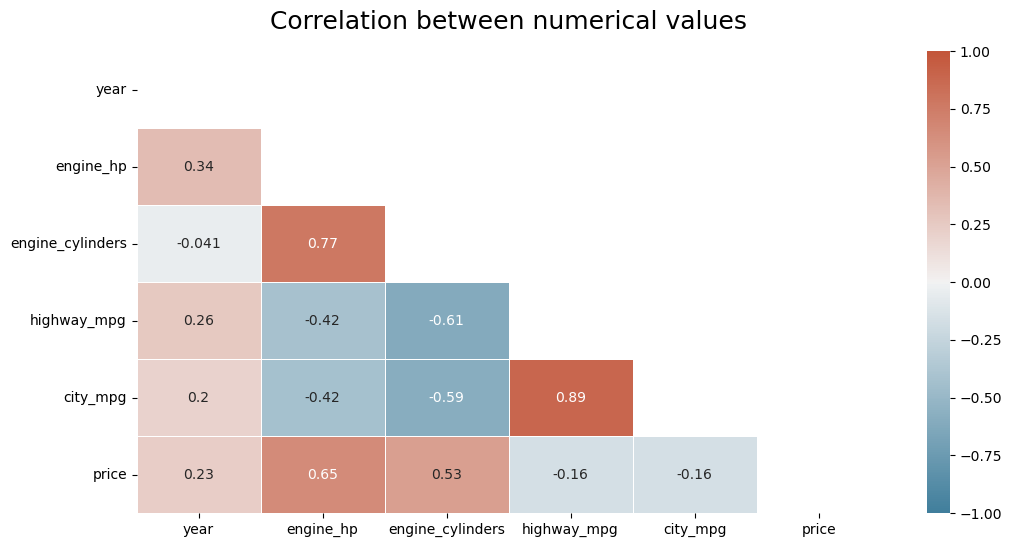

In [16]:
# First, plot the correlation heatmap to have visual insights
plot_correlation_heatmap(car_price, "Correlation between numerical values")

The "highway_mpg" and "city_mpg" features seem to have the highest correlation.

We can confirm it by determining the features that get the maximum absolute correlation value:

In [17]:
corr_matrix=car_price.corr(numeric_only=True)

In [18]:
# Extract the correlation coefficients from the correlation matrix (I use the absolute value to not miss any correlation)
ordered_correlations = abs(corr_matrix).unstack().sort_values(ascending=False)
ordered_correlations

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
highway_mpg       city_mpg            0.886829
city_mpg          highway_mpg         0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         price               0.650095
price             engine_hp           0.650095
engine_cylinders  highway_mpg         0.614541
highway_mpg       engine_cylinders    0.614541
engine_cylinders  city_mpg            0.587306
city_mpg          engine_cylinders    0.587306
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
city_mpg          engine_hp           0.424918
engine_hp         city_mpg            0.424918
highway_mpg       engine_hp           0.415707
engine_hp    

In [19]:
print(ordered_correlations[ordered_correlations < 1][:1])

highway_mpg  city_mpg    0.886829
dtype: float64


We confirm that the highest correlation coefficient is obtained between "highway_mpg" and "city_mpg".

# Make price binary

Now we need to turn the price variable from numeric into a binary format.

Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [20]:
# Calculate the mean of 'price'
price_mean = car_price["price"].mean()
price_mean

40594.737032063116

In [21]:
# Add a new column according to this mean price
car_price["above_average"] = np.where(
    car_price["price"] > price_mean, 1, 0
)

# Split the data

Split your data in train/val/test sets with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value (price) is not in your dataframe.

-> I will also make sure that the feature matrix will not contain the "above_average" column, which is our target for classification analysis

In [22]:
# First generate the full training dataset and the test dataset
full_train, test = train_test_split(car_price, test_size=0.2, random_state=42)

In [23]:
# Then separate the full training dataset into train and validation datasets. We have to adjust the proportions:
# we need 20% of the total number of rows from the 80% of values, which means we are looking for 0.25 proportion for the validation dataset
train, val = train_test_split(full_train, test_size=0.25, random_state=42)

In [24]:
train, val, test, y_train, y_val, y_test = separate_target_from_features(
    train, val, test, "above_average"
)

In [25]:
train.head(5)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475


In [26]:
train.shape

(7148, 10)

In [27]:
val.shape

(2383, 10)

In [28]:
test.shape

(2383, 10)

In [29]:
# I also remove the 'price' column from the three datasets
del train["price"]
del val["price"]
del test["price"]

# Question 3

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.

Round the scores to 2 decimals using round(score, 2).

In [30]:
# Isolate the categorical variables from the dataset
full_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
above_average          int32
dtype: object

In [31]:
# Put the categorical variables in a list
categorical_variables = ['make','model','transmission_type','vehicle_style']

In [32]:
# Here I use the full_train dataset and split it into train and val again
for categorical_variable in categorical_variables:
    
    # Since y_train is the "above_average" values, I use it directly to compute mutual information score
    mutual_score = round(
        mutual_info_score(y_train, train[categorical_variable]), 2
    )
    
    print(f"The mutual information score between 'above_average' and '{categorical_variable}' is equal to {mutual_score}.")

The mutual information score between 'above_average' and 'make' is equal to 0.24.
The mutual information score between 'above_average' and 'model' is equal to 0.46.
The mutual information score between 'above_average' and 'transmission_type' is equal to 0.02.
The mutual information score between 'above_average' and 'vehicle_style' is equal to 0.08.


Which of these variables has the lowest mutual information score?
- make
- model
- transmission_type
- vehicle_style

The variable 'transmission_type' has the lowest mutual information score (0.02).

# Question 4

Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Since some values for categorical variables are present in the train but not in validation, an error occurs (the model is trained on more features than the number of features in the validation dataset.

I try to encode these features before splitting the dataset into train, val and test sets:

In [ ]:
# Remove the price and above_average columns (we already have them since we use the same random_state)

In [55]:
car_price_one_hot = prepare_feature_matrix_onehot(car_price)

In [66]:
car_price.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price', 'above_average'],
      dtype='object')

In [56]:
# Check the shape of the obtained matrix before splitting : total of 991 features after one hot encoding
car_price_one_hot.shape

(11914, 991)

In [61]:
# Split the matrix 

# First generate the full training dataset and the test dataset
full_train, test = train_test_split(car_price_one_hot, test_size=0.2, random_state=42)

# Then separate the full training dataset into train and validation datasets. We have to adjust the proportions:
# we need 20% of the total number of rows from the 80% of values, which means we are looking for 0.25 proportion for the validation dataset
train, val = train_test_split(full_train, test_size=0.25, random_state=42)

In [62]:
train.shape

(7148, 991)

In [67]:
train[:5]

array([[0.000e+00, 1.500e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [0.000e+00, 1.700e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.000e+00, 1.200e+01, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [0.000e+00, 2.000e+01, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        2.016e+03],
       [0.000e+00, 2.000e+01, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        2.009e+03]])

In [60]:
test.shape

(2383, 991)

In [63]:
val.shape

(2383, 991)

All feature matrices have the same number of features.

In [53]:
# Extract feature list from training dataset
feature_list = train.columns.tolist()

# Calculate the accuracy for training, validation and test datasets
train_acc, val_acc, test_acc = logistic_regression_accuracy(
    feature_list=feature_list,
    train=train,
    val=val,
    test=test,
    y_train=y_train,
    y_val=y_val,
    y_test=y_test,
)

The features used are ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'].
(7148, 943)
(2383, 788)
(2383, 779)
Training Accuracy Score 0.953


ValueError: X has 788 features, but LogisticRegression is expecting 943 features as input.

In [64]:
type(train)

numpy.ndarray